In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/olympic-games/dictionary.csv
/kaggle/input/olympic-games/winter.csv
/kaggle/input/olympic-games/summer.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [3]:
country=pd.read_csv("/kaggle/input/olympic-games/dictionary.csv")
summer=pd.read_csv("/kaggle/input/olympic-games/summer.csv")
winter=pd.read_csv("/kaggle/input/olympic-games/winter.csv")

In [4]:
country.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [5]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         201 non-null    object 
 1   Code            201 non-null    object 
 2   Population      196 non-null    float64
 3   GDP per Capita  176 non-null    float64
dtypes: float64(2), object(2)
memory usage: 6.4+ KB


In [6]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [7]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [8]:
#reformatting the Athlete Name
summer['Athlete']=summer['Athlete'].str.split(', ').str[::-1].str.join(' ')
summer['Athlete']=summer['Athlete'].str.title()
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver


In [9]:
winter.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


In [10]:
winter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5770 entries, 0 to 5769
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        5770 non-null   int64 
 1   City        5770 non-null   object
 2   Sport       5770 non-null   object
 3   Discipline  5770 non-null   object
 4   Athlete     5770 non-null   object
 5   Country     5770 non-null   object
 6   Gender      5770 non-null   object
 7   Event       5770 non-null   object
 8   Medal       5770 non-null   object
dtypes: int64(1), object(8)
memory usage: 405.8+ KB


In [11]:
# Reformatting the Athlete Name
winter['Athlete']=winter['Athlete'].str.split(', ').str[::-1].str.join(' ')
winter['Athlete']=winter['Athlete'].str.title()
winter.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,G. Berthet,FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,C. Mandrillon,FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,Maurice Mandrillon,FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,André Vandelle,FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,Adolf Aufdenblatten,SUI,Men,Military Patrol,Gold


**SUMMER OLYMPICS ANALYSIS**

In [12]:
#merging the Country table with Summer table
summer=summer.merge(country,left_on='Country',right_on='Code',how='left')
summer=summer[['Year','City','Sport','Discipline','Athlete','Country_x','Gender','Event','Medal','Country_y']]
summer.columns=['Year','City','Sport','Discipline','Athlete','Code','Gender','Event','Medal','Country']
summer.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold,Hungary
1,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver,Austria
2,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver,Greece


In [13]:
male_most_medals = summer[summer['Gender']=='Men']['Athlete'].value_counts()[:1].index[0]
male_medals = summer[summer['Gender']=='Men']['Athlete'].value_counts()[:1].values[0]

print('The Highest Decorated Male Athlete is: ',male_most_medals,'with: ',male_medals,' medals')

The Highest Decorated Male Athlete is:  Michael Phelps with:  22  medals


In [14]:
female_most_medals = summer[summer['Gender']=='Women']['Athlete'].value_counts()[:1].index[0]
female_medals = summer[summer['Gender']=='Women']['Athlete'].value_counts()[:1].values[0]

print('The Highest Decorated Female Athlete is: ',female_most_medals,'with: ',female_medals,' medals')

The Highest Decorated Female Athlete is:  Larisa Latynina with:  18  medals


In [15]:
medals = summer.groupby(['Athlete','Medal'])['Sport'].count().reset_index().sort_values(by='Sport',ascending=False)
medals

,Athlete,Medal,Sport
17344,Michael Phelps,Gold,18
3517,Carl Lewis,Gold,9
16581,Mark Spitz,Gold,9
19224,Paavo Nurmi,Gold,9
14731,Larisa Latynina,Gold,9
...,...,...,...
9532,Harald Sandberg,Bronze,1
9531,Harald S.A. Julin,Silver,1
9529,Harald Oliver Faerstad,Silver,1
9528,Harald Norpoth,Silver,1


In [16]:
medals = medals.drop_duplicates(subset=['Medal'],keep='first')
medals.columns = [['Athlete','Medal','Count']]
medals

,Athlete,Medal,Count
17344,Michael Phelps,Gold,18
7645,Franziska Van Almsick,Bronze,6
22307,Shirley Farber Babashoff,Silver,6


Most Gold medals(18) were won by Michael Phelps; Most Silver medals(6) were won by Shirley farber Babashoff; Most Bronze medals(6) were won by Franzika Van Almsick

In [17]:
#medals by country
medals_country = summer.groupby(['Country','Medal'])['Gender'].count().reset_index().sort_values(by='Gender',ascending=False)
medals_country = medals_country.pivot('Country','Medal','Gender').fillna(0)
medals_country

Medal,Bronze,Gold,Silver
Country,,,
Afghanistan,2.0,0.0,0.0
Algeria,8.0,5.0,2.0
Argentina,91.0,69.0,99.0
Armenia,8.0,1.0,2.0
Australia,472.0,312.0,405.0
...,...,...,...
Venezuela,8.0,2.0,2.0
Vietnam,0.0,0.0,2.0
Virgin Islands*,0.0,0.0,1.0


In [18]:
top = medals_country.sort_values(by='Gold',ascending=False)[:11]
top

Medal,Bronze,Gold,Silver
Country,,,
United States,1098.0,2235.0,1252.0
United Kingdom,553.0,546.0,621.0
Italy,404.0,476.0,416.0
Germany,475.0,452.0,378.0
Hungary,351.0,412.0,316.0
France,497.0,408.0,491.0
Sweden,328.0,349.0,367.0
Australia,472.0,312.0,405.0
China,221.0,290.0,296.0


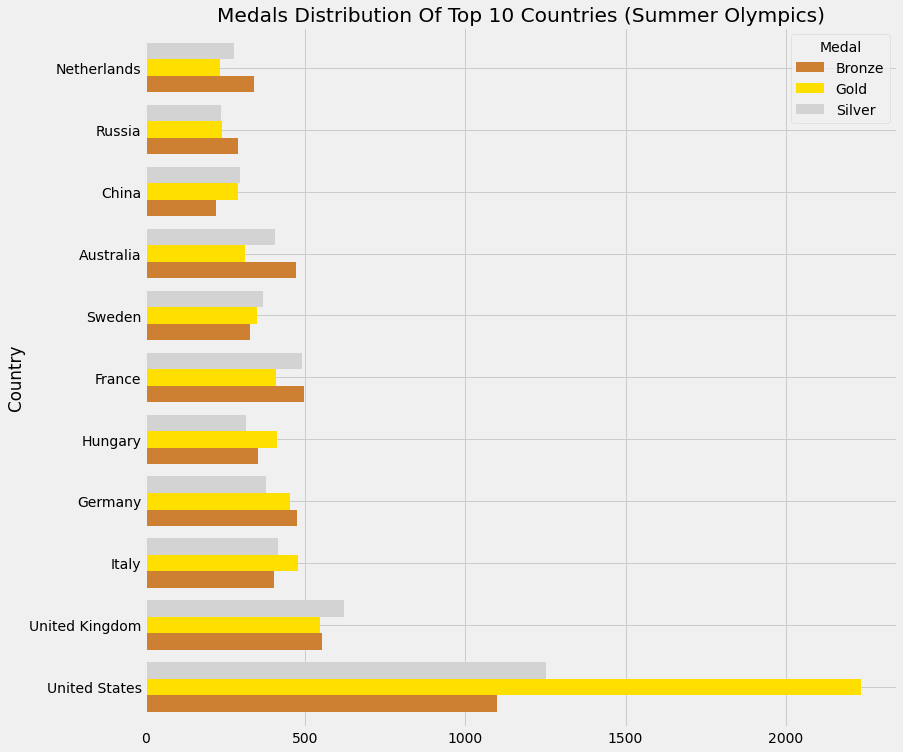

In [19]:
top.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'])
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.title('Medals Distribution Of Top 10 Countries (Summer Olympics)')
plt.show()

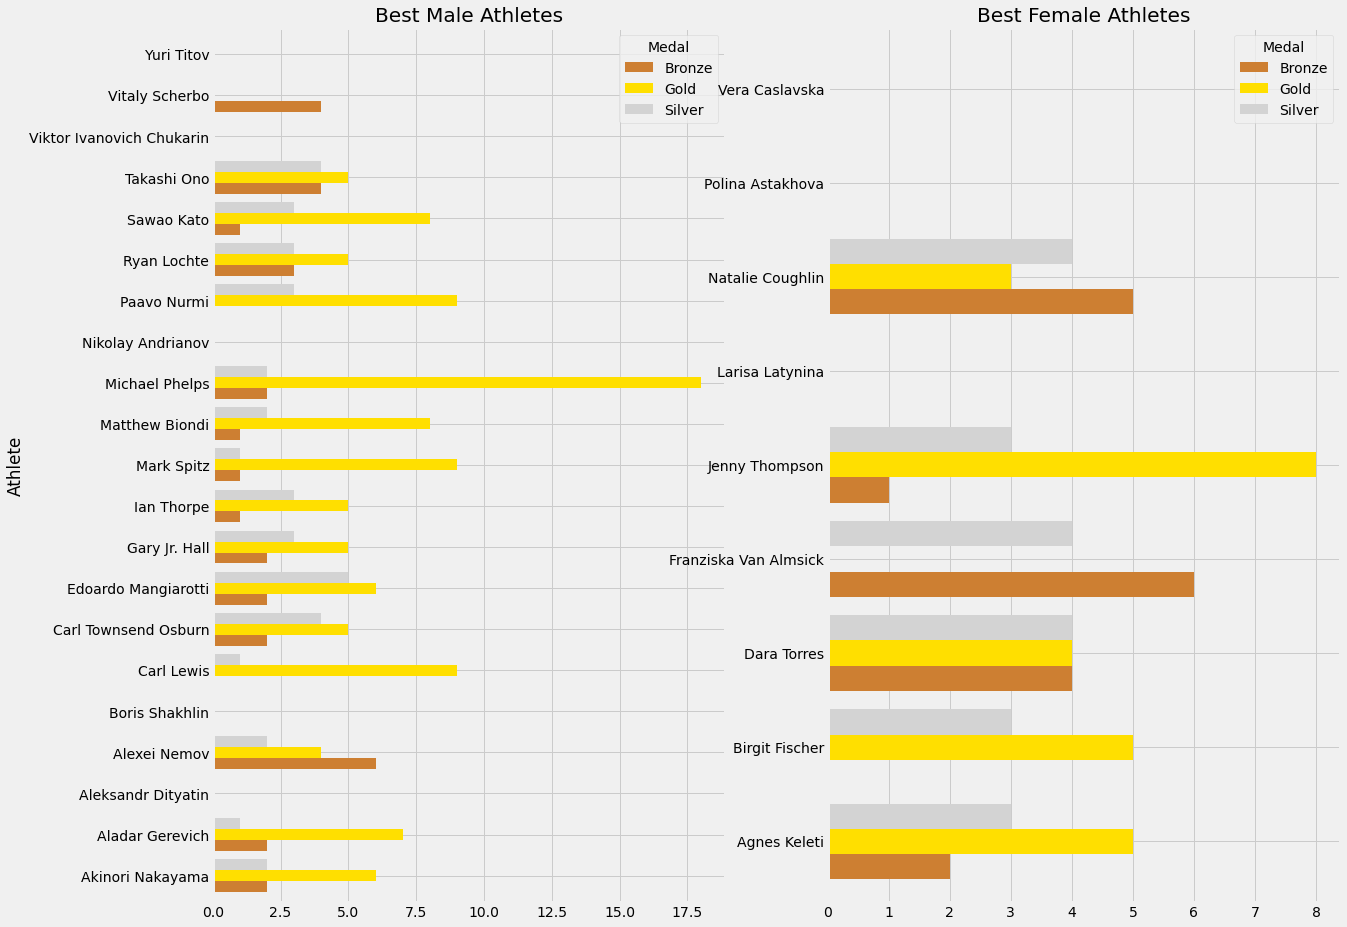

In [20]:
fig,ax=plt.subplots(1,2,figsize=(18,15))
men=summer[summer['Gender']=='Men']
men=men.groupby(['Athlete','Medal'])['Country'].count().reset_index().sort_values(by='Country',ascending=False)
men=men[men['Athlete'].isin(summer['Athlete'].value_counts().index[:30])]
men=men.pivot('Athlete','Medal','Country')
men.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Best Male Athletes')
ax[0].set_ylabel('Athlete')

women=summer[summer['Gender']=='Women']
women=women.groupby(['Athlete','Medal'])['Country'].count().reset_index().sort_values(by='Country',ascending=False)
women=women[women['Athlete'].isin(summer['Athlete'].value_counts().index[:30])]
women=women.pivot('Athlete','Medal','Country')
women.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[1])
ax[1].set_title('Best Female Athletes')
ax[1].set_ylabel('')
plt.show()

In [21]:
summer['Discipline'].unique()

array(['Swimming', 'Athletics', 'Cycling Road', 'Cycling Track',
       'Fencing', 'Artistic G.', 'Shooting', 'Tennis', 'Weightlifting',
       'Wrestling Gre-R', 'Water polo', 'Archery', 'Basque Pelota',
       'Cricket', 'Croquet', 'Jumping', 'Football', 'Golf', 'Polo',
       'Rowing', 'Rugby', 'Sailing', 'Tug of War', 'Diving', 'Boxing',
       'Lacrosse', 'Roque', 'Wrestling Free.', 'Hockey', 'Jeu de Paume',
       'Rackets', 'Figure skating', 'Water Motorspor', 'Dressage',
       'Eventing', 'Modern Pentath.', 'Vaulting', 'Ice Hockey',
       'Basketball', 'Canoe / Kayak F', 'Handball', 'Judo', 'Volleyball',
       'Canoe / Kayak S', 'Synchronized S.', 'Rhythmic G.',
       'Table Tennis', 'Badminton', 'Baseball', 'Mountain Bike',
       'Softball', 'Beach volley.', 'Trampoline', 'Taekwondo',
       'Triathlon', 'BMX', 'Marathon swimming', 'Synchronized Swimming',
       'Water Polo', 'Canoe Slalom', 'Canoe Sprint', 'Cycling BMX',
       'Gymnastics Artistic', 'Gymnastics Rhythmi

In [22]:
summer.loc[summer['Discipline'].str.contains('Wrestling'),'Discipline']='Wrestling'
summer.loc[summer['Discipline'].str.contains('Weightlifting'),'Discipline']='Weightlifting'
summer.loc[summer['Discipline'].str.contains('Swimming'),'Discipline']='Swimming'

test=summer[summer['Country'].isin(summer['Country'].value_counts()[:10].index)]
test.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold,Hungary
6,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,1200M Freestyle,Gold,Hungary
11,1896,Athens,Athletics,Athletics,Francis Lane,USA,Men,100M,Bronze,United States
12,1896,Athens,Athletics,Athletics,Alajos Szokolyi,HUN,Men,100M,Bronze,Hungary
13,1896,Athens,Athletics,Athletics,Thomas Burke,USA,Men,100M,Gold,United States


In [23]:
test=test[test['Discipline'].isin(summer['Discipline'].value_counts()[:10].index)]
test.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold,Hungary
6,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,1200M Freestyle,Gold,Hungary
11,1896,Athens,Athletics,Athletics,Francis Lane,USA,Men,100M,Bronze,United States
12,1896,Athens,Athletics,Athletics,Alajos Szokolyi,HUN,Men,100M,Bronze,Hungary
13,1896,Athens,Athletics,Athletics,Thomas Burke,USA,Men,100M,Gold,United States


In [24]:
test=test.groupby(['Country','Discipline'])['Sport'].count().reset_index()
test.head()

,Country,Discipline,Sport
0,Australia,Athletics,84
1,Australia,Hockey,189
2,Australia,Rowing,135
3,Australia,Sailing,46
4,Australia,Shooting,10


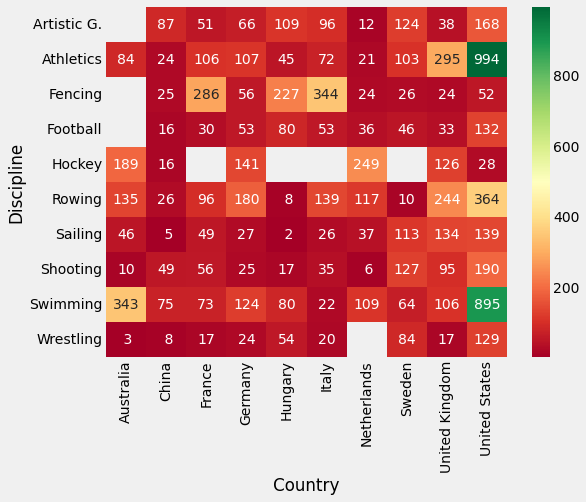

In [25]:
test=test.pivot('Discipline','Country','Sport')
sns.heatmap(test,cmap='RdYlGn',annot=True,fmt='2.0f')
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

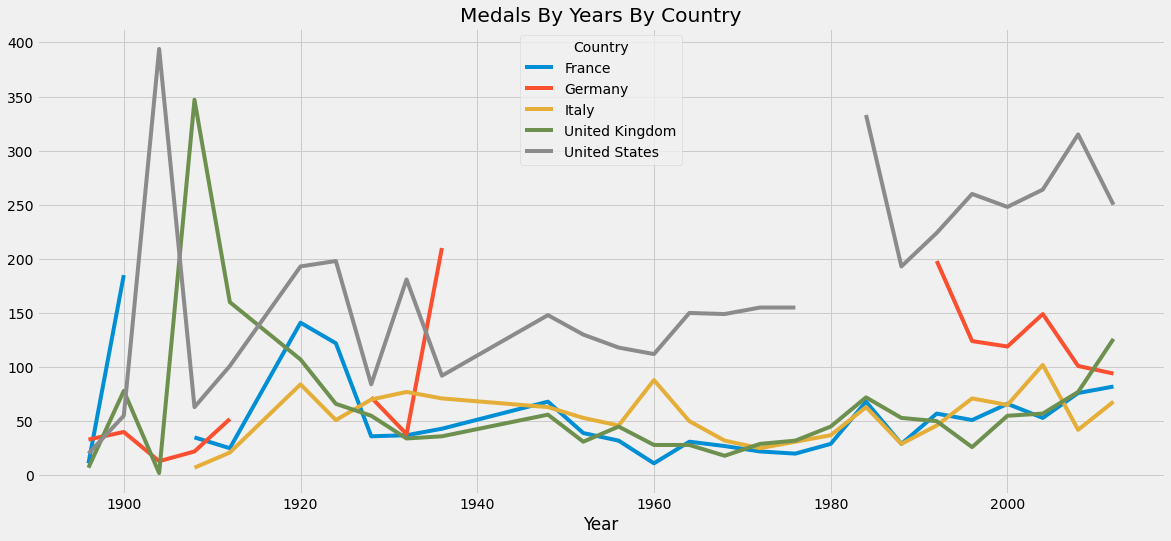

In [26]:
test1=summer.groupby(['Country','Year'])['Medal'].count().reset_index()
test1=test1[test1['Country'].isin(summer['Country'].value_counts()[:5].index)]
test1=test1.pivot('Year','Country','Medal')
test1.plot()
fig=plt.gcf()
fig.set_size_inches(18,8)
plt.title('Medals By Years By Country')
plt.show()

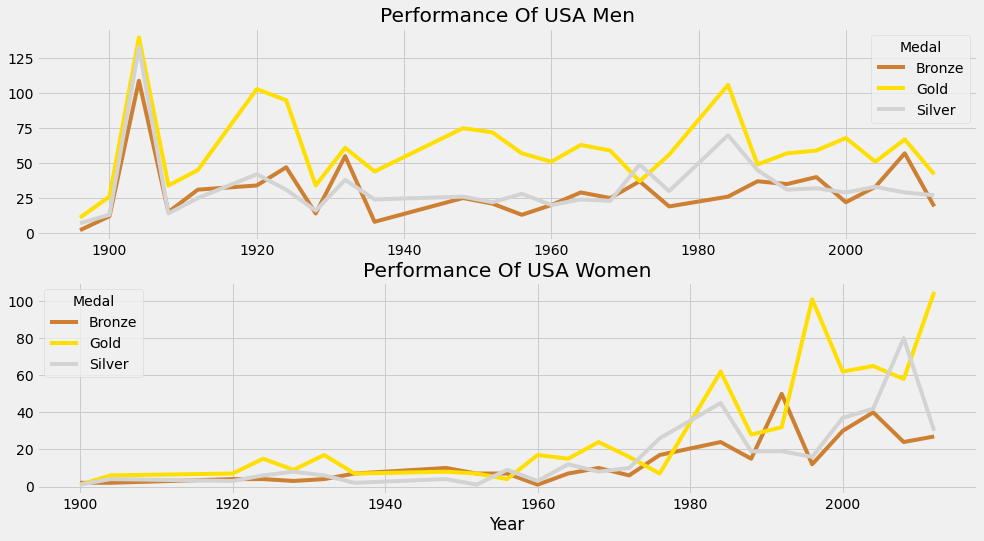

In [27]:
USA_medal_male=summer[(summer['Country']=='United States')&(summer['Gender']=='Men')]
USA_medal_female=summer[(summer['Country']=='United States')&(summer['Gender']=='Women')]
fig,ax=plt.subplots(2,figsize=(15,8))
male=USA_medal_male.groupby(['Medal','Year'])['Event'].count().reset_index()
male=male.pivot('Year','Medal','Event')
male.plot(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_xlabel(' ')
ax[0].set_title('Performance Of USA Men')
female=USA_medal_female.groupby(['Medal','Year'])['Event'].count().reset_index()
female=female.pivot('Year','Medal','Event')
female.plot(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[1])
ax[1].set_title('Performance Of USA Women')
plt.show()

**WINTER OLYMPICS ANALYSIS**

In [28]:
#merging the Country table with winter table
winter=winter.merge(country,left_on='Country',right_on='Code',how='left')
winter=winter[['Year','City','Sport','Discipline','Athlete','Country_x','Gender','Event','Medal','Country_y']]
winter.columns=['Year','City','Sport','Discipline','Athlete','Code','Gender','Event','Medal','Country']
winter.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,1924,Chamonix,Biathlon,Biathlon,G. Berthet,FRA,Men,Military Patrol,Bronze,France
1,1924,Chamonix,Biathlon,Biathlon,C. Mandrillon,FRA,Men,Military Patrol,Bronze,France
2,1924,Chamonix,Biathlon,Biathlon,Maurice Mandrillon,FRA,Men,Military Patrol,Bronze,France
3,1924,Chamonix,Biathlon,Biathlon,André Vandelle,FRA,Men,Military Patrol,Bronze,France
4,1924,Chamonix,Biathlon,Biathlon,Adolf Aufdenblatten,SUI,Men,Military Patrol,Gold,Switzerland


In [29]:
male_most_medals = winter[winter['Gender']=='Men']['Athlete'].value_counts()[:1].index[0]
male_medals = winter[winter['Gender']=='Men']['Athlete'].value_counts()[:1].values[0]

print('The Highest Decorated Male Athlete is: ',male_most_medals,'with: ',male_medals,' medals')

The Highest Decorated Male Athlete is:  Ole Einar Bjoerndalen with:  13  medals


In [30]:
male_most_medals = winter[winter['Gender']=='Women']['Athlete'].value_counts()[:1].index[0]
male_medals = winter[winter['Gender']=='Women']['Athlete'].value_counts()[:1].values[0]

print('The Highest Decorated Male Athlete is: ',male_most_medals,'with: ',male_medals,' medals')

The Highest Decorated Male Athlete is:  Stefania Belmondo with:  10  medals


In [31]:
medals = winter.groupby(['Athlete','Medal'])['Sport'].count().reset_index().sort_values(by='Sport',ascending=False)
medals

,Athlete,Medal,Sport
569,Björn Daehlie,Gold,8
3303,Ole Einar Bjoerndalen,Gold,8
1655,Harri Kirvesniemi,Bronze,6
2841,Marit Bjoergen,Gold,6
2658,Ljubov Egorova,Gold,6
...,...,...,...
1713,Henrik Lundqvist,Gold,1
1714,Henrik Lundqvist,Silver,1
1715,Henrik Sedin,Gold,1
1716,Henrik Tallinder,Silver,1


In [32]:
medals = medals.drop_duplicates(subset=['Medal'],keep='first')
medals.columns = [['Athlete','Medal','Count']]
medals

,Athlete,Medal,Count
569,Björn Daehlie,Gold,8
1655,Harri Kirvesniemi,Bronze,6
3568,Raisa Smetanina,Silver,5


In [33]:
#medals by country
medals_country = winter.groupby(['Country','Medal'])['Gender'].count().reset_index().sort_values(by='Gender',ascending=False)
medals_country = medals_country.pivot('Country','Medal','Gender').fillna(0)
medals_country

Medal,Bronze,Gold,Silver
Country,,,
Australia,7.0,5.0,3.0
Austria,103.0,79.0,98.0
Belarus,5.0,6.0,4.0
Belgium,7.0,2.0,4.0
Bulgaria,3.0,1.0,2.0
Canada,107.0,315.0,203.0
China,36.0,16.0,30.0
Croatia,1.0,4.0,6.0
Czech Republic,35.0,28.0,12.0


In [34]:
top = medals_country.sort_values(by='Gold',ascending=False)[:11]
top

Medal,Bronze,Gold,Silver
Country,,,
Canada,107.0,315.0,203.0
United States,167.0,167.0,319.0
Norway,127.0,159.0,171.0
Germany,97.0,137.0,126.0
Sweden,177.0,127.0,129.0
Russia,79.0,94.0,90.0
Austria,103.0,79.0,98.0
Switzerland,132.0,76.0,77.0
Finland,221.0,66.0,147.0


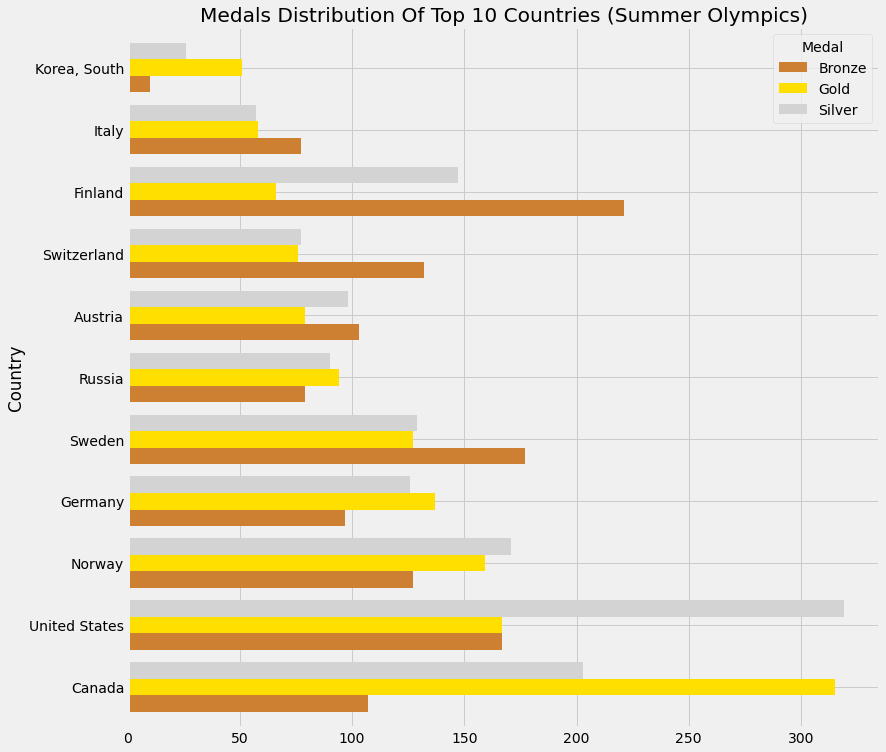

In [35]:
top.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'])
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.title('Medals Distribution Of Top 10 Countries (Summer Olympics)')
plt.show()

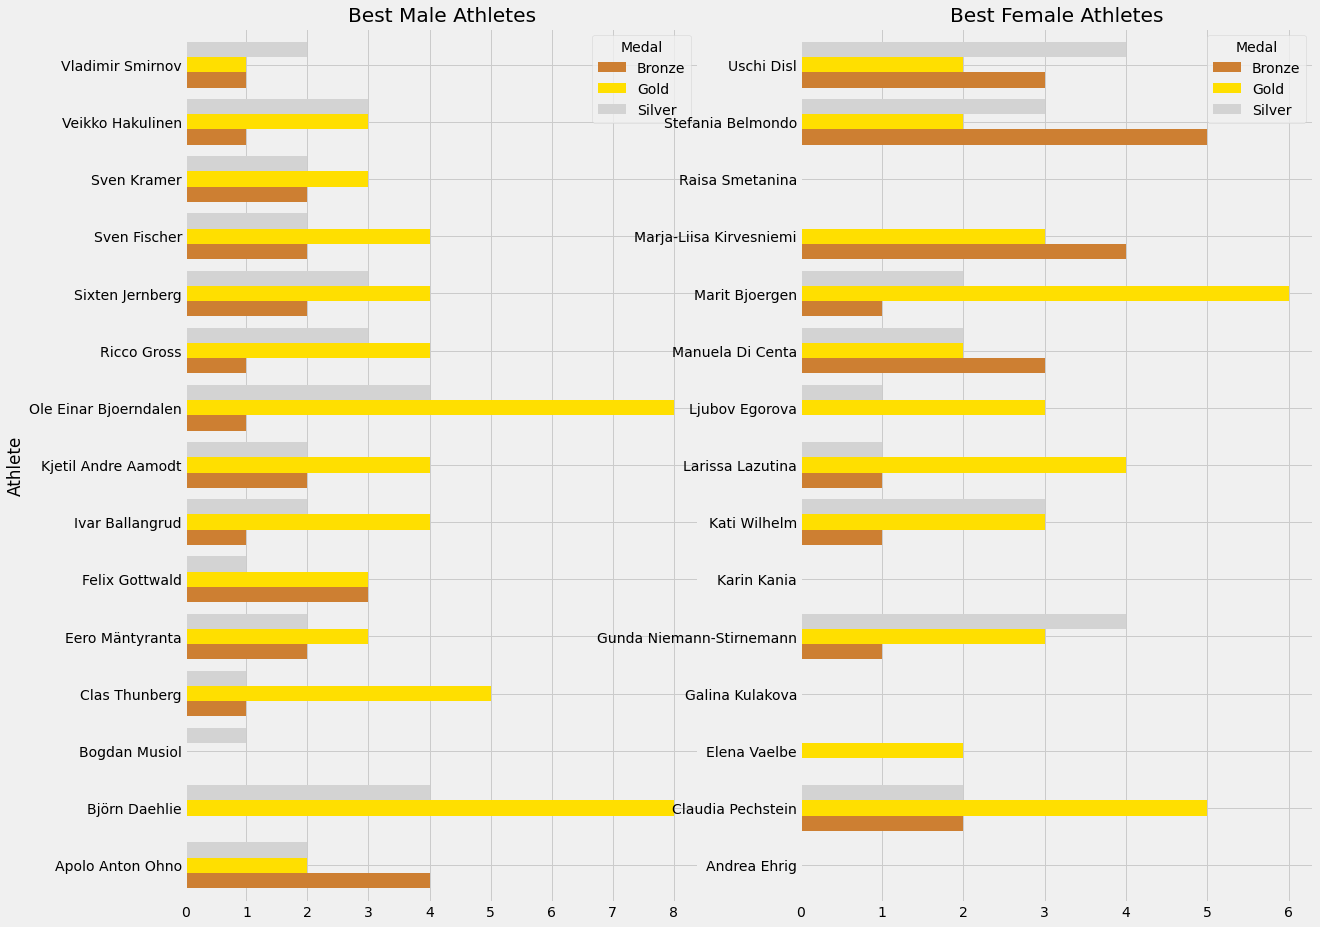

In [36]:
fig,ax=plt.subplots(1,2,figsize=(18,15))
men=winter[winter['Gender']=='Men']
men=men.groupby(['Athlete','Medal'])['Country'].count().reset_index().sort_values(by='Country',ascending=False)
men=men[men['Athlete'].isin(winter['Athlete'].value_counts().index[:30])]
men=men.pivot('Athlete','Medal','Country')
men.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Best Male Athletes')
ax[0].set_ylabel('Athlete')

women=winter[winter['Gender']=='Women']
women=women.groupby(['Athlete','Medal'])['Country'].count().reset_index().sort_values(by='Country',ascending=False)
women=women[women['Athlete'].isin(winter['Athlete'].value_counts().index[:30])]
women=women.pivot('Athlete','Medal','Country')
women.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[1])
ax[1].set_title('Best Female Athletes')
ax[1].set_ylabel('')
plt.show()

In [37]:
winter['Discipline'].unique()

array(['Biathlon', 'Bobsleigh', 'Curling', 'Ice Hockey', 'Figure skating',
       'Speed skating', 'Cross Country Skiing', 'Nordic Combined',
       'Ski Jumping', 'Skeleton', 'Alpine Skiing', 'Luge',
       'Short Track Speed Skating', 'Freestyle Skiing', 'Snowboard'],
      dtype=object)

In [38]:
winter.loc[winter['Discipline'].str.contains('Skiing'),'Discipline']='Skiing'
winter.loc[winter['Discipline'].str.contains('Skating'),'Discipline']='Skating'
winter.loc[winter['Discipline'].str.contains('skating'),'Discipline']='Skating'

test=winter[winter['Country'].isin(winter['Country'].value_counts().index)]
test.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,1924,Chamonix,Biathlon,Biathlon,G. Berthet,FRA,Men,Military Patrol,Bronze,France
1,1924,Chamonix,Biathlon,Biathlon,C. Mandrillon,FRA,Men,Military Patrol,Bronze,France
2,1924,Chamonix,Biathlon,Biathlon,Maurice Mandrillon,FRA,Men,Military Patrol,Bronze,France
3,1924,Chamonix,Biathlon,Biathlon,André Vandelle,FRA,Men,Military Patrol,Bronze,France
4,1924,Chamonix,Biathlon,Biathlon,Adolf Aufdenblatten,SUI,Men,Military Patrol,Gold,Switzerland


In [39]:
test=test[test['Discipline'].isin(winter['Discipline'].value_counts()[:10].index)]
test.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,1924,Chamonix,Biathlon,Biathlon,G. Berthet,FRA,Men,Military Patrol,Bronze,France
1,1924,Chamonix,Biathlon,Biathlon,C. Mandrillon,FRA,Men,Military Patrol,Bronze,France
2,1924,Chamonix,Biathlon,Biathlon,Maurice Mandrillon,FRA,Men,Military Patrol,Bronze,France
3,1924,Chamonix,Biathlon,Biathlon,André Vandelle,FRA,Men,Military Patrol,Bronze,France
4,1924,Chamonix,Biathlon,Biathlon,Adolf Aufdenblatten,SUI,Men,Military Patrol,Gold,Switzerland


In [40]:
test=test.groupby(['Country','Discipline'])['Sport'].count().reset_index()
test.head()

,Country,Discipline,Sport
0,Australia,Skating,5
1,Australia,Skiing,8
2,Australia,Snowboard,2
3,Austria,Biathlon,11
4,Austria,Bobsleigh,12


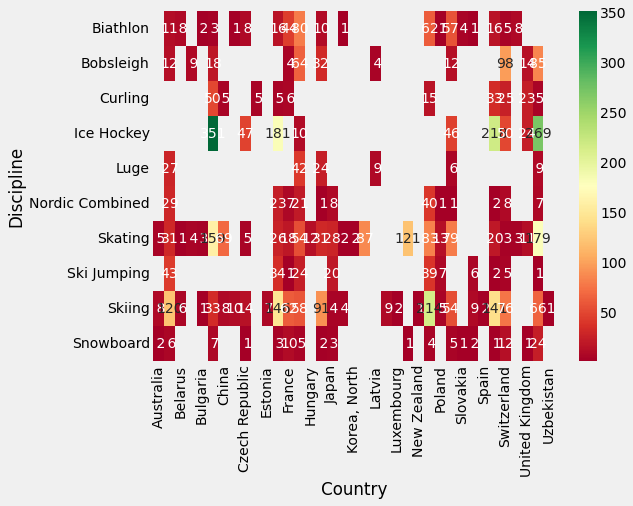

In [41]:
test=test.pivot('Discipline','Country','Sport')
sns.heatmap(test,cmap='RdYlGn',annot=True,fmt='2.0f')
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

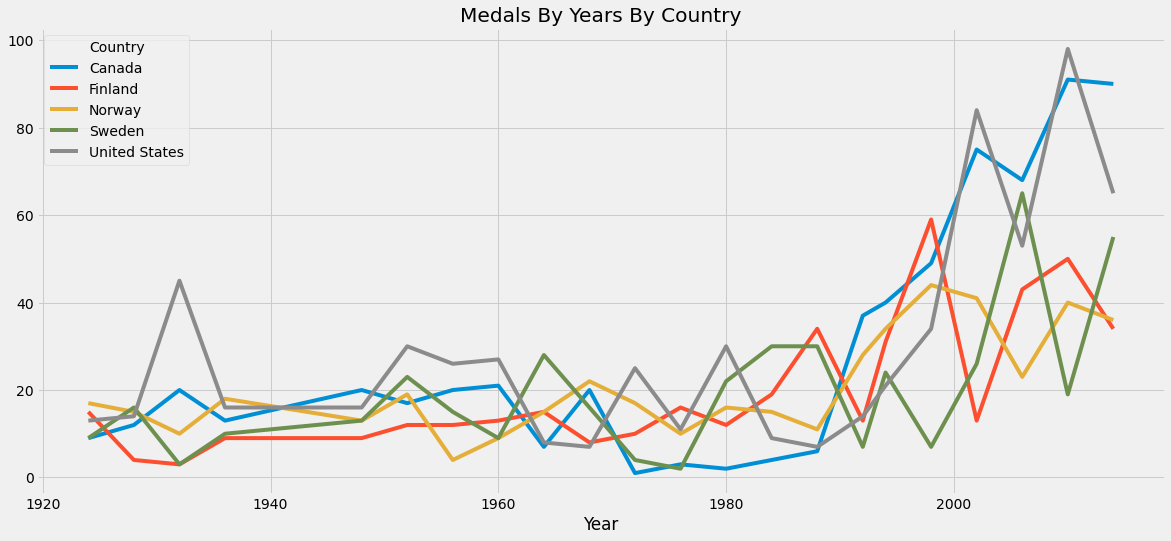

In [42]:
test1=winter.groupby(['Country','Year'])['Medal'].count().reset_index()
test1=test1[test1['Country'].isin(winter['Country'].value_counts()[:5].index)]
test1=test1.pivot('Year','Country','Medal')
test1.plot()
fig=plt.gcf()
fig.set_size_inches(18,8)
plt.title('Medals By Years By Country')
plt.show()

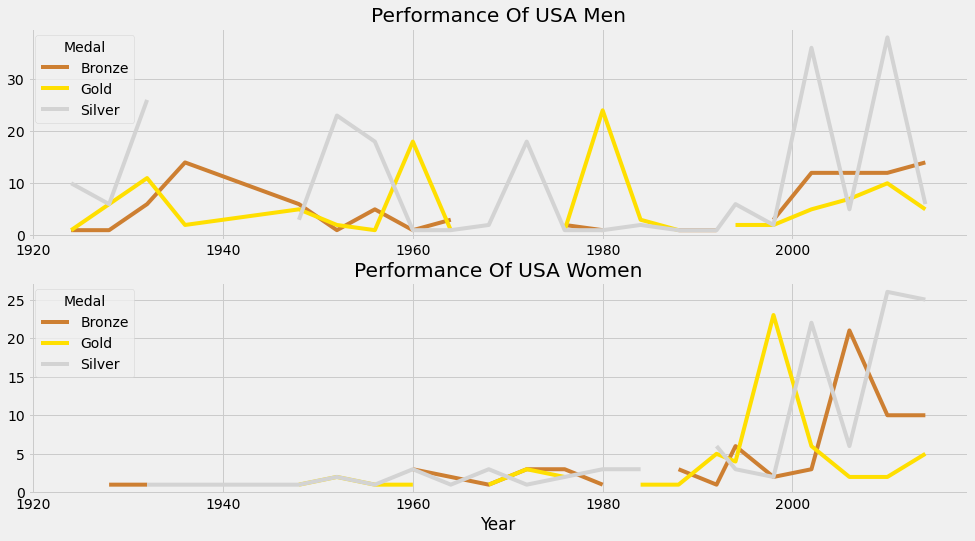

In [43]:
USA_medal_male=winter[(winter['Country']=='United States')&(winter['Gender']=='Men')]
USA_medal_female=winter[(winter['Country']=='United States')&(winter['Gender']=='Women')]
fig,ax=plt.subplots(2,figsize=(15,8))
male=USA_medal_male.groupby(['Medal','Year'])['Event'].count().reset_index()
male=male.pivot('Year','Medal','Event')
male.plot(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_xlabel(' ')
ax[0].set_title('Performance Of USA Men')
female=USA_medal_female.groupby(['Medal','Year'])['Event'].count().reset_index()
female=female.pivot('Year','Medal','Event')
female.plot(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[1])
ax[1].set_title('Performance Of USA Women')
plt.show()